# **AES Algorithm (Advanced Encryption Standard)**

### **Importing the Libraries**

In [37]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#Connection to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Importing the necessary libraries
import numpy as np
from IPython.display import Image, display
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
import time
from timeit import default_timer as timer
from datetime import timedelta

In [41]:
import xlwt
import xlsxwriter
from xlwt import Workbook
import pandas as pd

In [42]:
#Creating variables to store time data
time_taken_e = []
encryption = []
time_taken_d = []
decryption = []

aes_img_1_ed =[]
aes_img_2_ed =[]
aes_img_3_ed =[]

In [43]:
#Variables to store time taken for encryption and decryption
from array import array

encryption_image = []
encryption_type = []
encryption_time = []

decryption_image = []
decryption_type = []
decryption_time = []

encryption_time_img1=0
encryption_time_img2=0
encryption_time_img3=0

decryption_time_img1=0
decryption_time_img2=0
decryption_time_img3=0

## **AES Algorithm On Image 1**

### **Image Preprocessing**

(735, 980, 3)


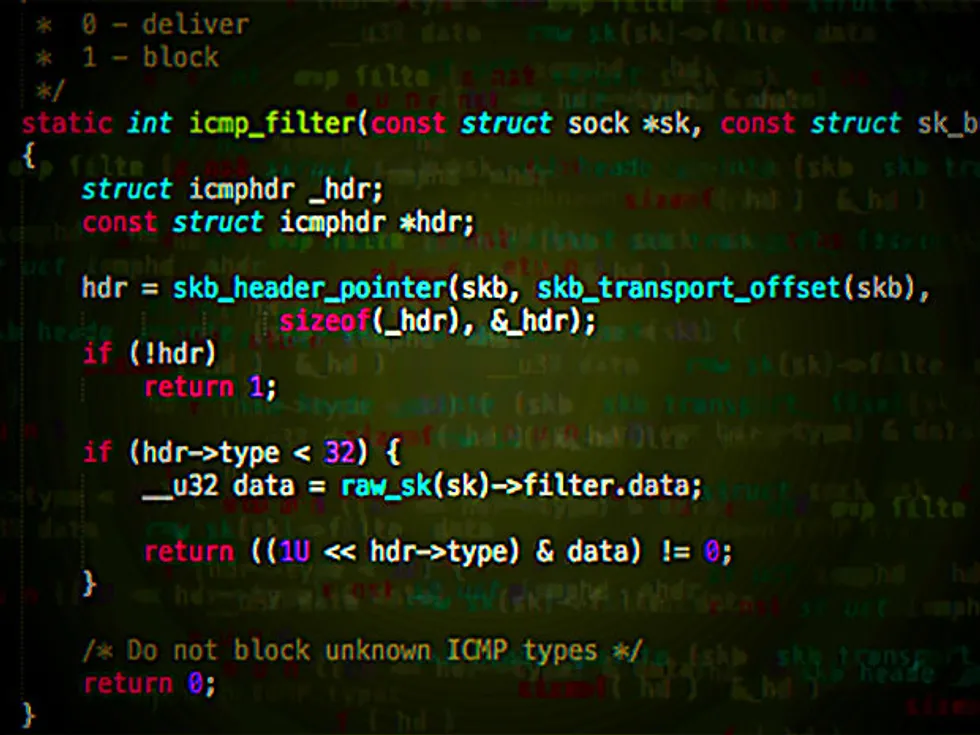


 (735, 980)


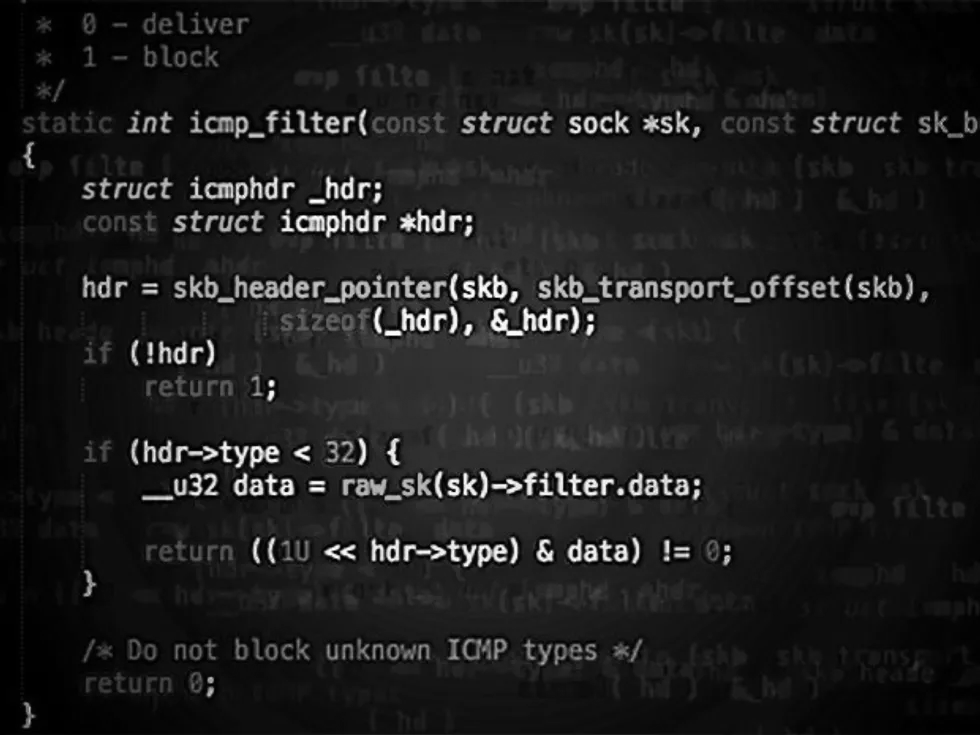


 (256, 256)


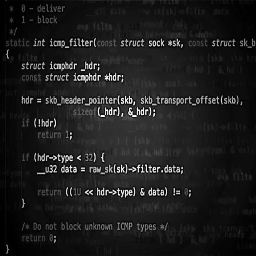

In [55]:
# Loading the image
img = cv2.imread('drive/My Drive/CN_Project/1.jpg')
#plt.imshow(img)
print(img.shape)
cv2_imshow(img)

# RGB to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('\n',img.shape)
cv2_imshow(img)

# Resizing
img=cv2.resize(img,(256,256))
print('\n',img.shape)
cv2_imshow(img)

# print(img)

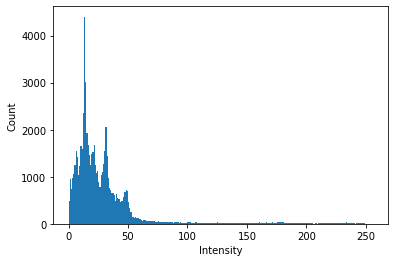

In [56]:
# Make histogram for the image
plt.hist(img.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

### **Image Encryption**

In [57]:
# Round Key generation
roundKey=np.random.randint(256,size=(256,256))

**Substitute Byte Transformation**

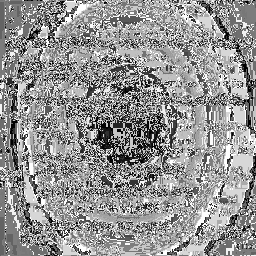

In [58]:
start_time = time.time()

def sub_byte_transform(img):
  sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img_hex = vhex(img)
  # print(img_hex)

  # Substitute byte transformation
  img_sbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img_hex[i][j],0)
      img_sbt[i][j]=sbox[k]
  return img_sbt

img_sbt=np.zeros((256,256),int)
img_sbt=sub_byte_transform(img)
# print(img_sbt)
cv2_imshow(img_sbt)

# print(time.time() - start_time)
time_taken_e.append(time.time() - start_time)
encryption.append("Substitute Byte Transformation")

encryption_time_img1 += time.time() - start_time

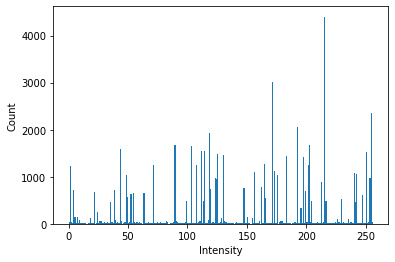

In [59]:
# Make histogram for the image
plt.hist(img_sbt.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Shift Rows Transformation**

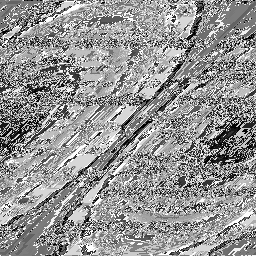

In [60]:
start_time = time.time()

def shift_row_transform(img_sbt):
  img_srt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img_sbt=img_sbt.tolist()

  #  Shift rows transformation
  for i in range(256):
    img_srt[i]=img_sbt[i][i:]+img_sbt[i][0:i]
  
  return img_srt

img_srt=np.zeros((256,256),int)
img_srt=shift_row_transform(img_sbt)
# print(img_srt)
cv2_imshow(img_srt)

#print(time.time() - start_time)
time_taken_e.append(time.time() - start_time)
encryption.append("Shift Rows Transformation")

encryption_time_img1 += time.time() - start_time

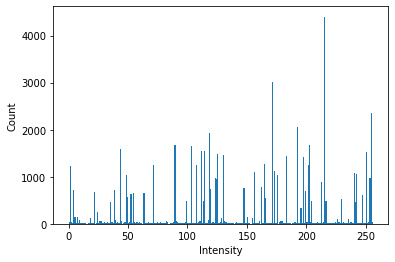

In [61]:
# Make histogram for the image
plt.hist(img_srt.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Mix Columns Transformation**

In [62]:
# Galois Multiplication

def galoisMult(a, b):
    p = 0
    hiBitSet = 0
    for i in range(8):
        if b & 1 == 1:
            p ^= a
        hiBitSet = a & 0x80
        a <<= 1
        if hiBitSet == 0x80:
            a ^= 0x1b
        b >>= 1
    return p % 256

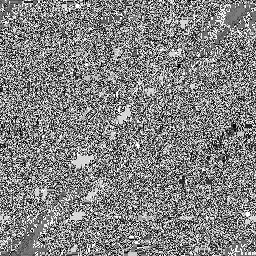

In [63]:
start_time = time.time()

def mix_col_transform(img_srt):
  img_mct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img_srt[i][j]
      temp[1]=img_srt[i+1][j]
      temp[2]=img_srt[i+2][j]
      temp[3]=img_srt[i+3][j]
      
      img_mct[i][j] = galoisMult(temp[0],2) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],3)
      img_mct[i+1][j] = galoisMult(temp[1],2) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],3)
      img_mct[i+2][j] = galoisMult(temp[2],2) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],3)
      img_mct[i+3][j] = galoisMult(temp[3],2) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],3)

  return img_mct

img_mct=np.zeros((256,256),int)
img_mct=mix_col_transform(img_srt)
# print(img_mct)
cv2_imshow(img_mct)

#print(time.time() - start_time)

time_taken_e.append(time.time() - start_time)
encryption.append("Mix Columns Transformation")

encryption_time_img1 += time.time() - start_time

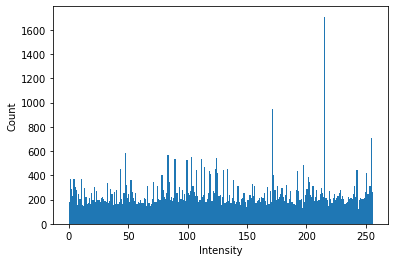

In [64]:
# Make histogram for the image
plt.hist(img_mct.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Add Round Key Transformation**

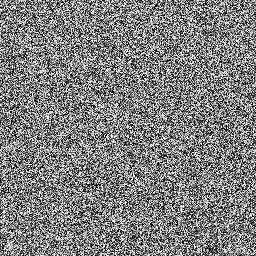

In [65]:
start_time = time.time()

def add_round_key_transform(img_mct,roundKey):
  img_arkt=np.zeros((256,256),int)
  img_arkt=img_mct^roundKey

  return img_arkt

img_arkt=np.zeros((256,256),int)
img_arkt=add_round_key_transform(img_mct,roundKey)
# print(img_arkt)
cv2_imshow(img_arkt)

#print(time.time() - start_time)

time_taken_e.append(time.time() - start_time)
encryption.append("Add Round Key Transformation")

encryption_time_img1 += time.time() - start_time

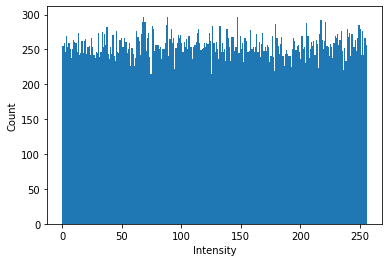

In [66]:
# Make histogram for the image
plt.hist(img_arkt.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time taken to do the Encryption

In [67]:
total_time_encryption= 0
for x in time_taken_e:
  total_time_encryption += x;
#print(total_time_encryption)

aes_img_1_ed.append(total_time_encryption)

In [68]:
encryption_image.append("Image 1")
encryption_type.append("Encryption")
encryption_time.append(encryption_time_img1)

### **Image Decryption**

**Add Round Key Transformation**

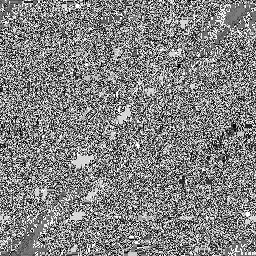

In [71]:
start_time = time.time()

def inverse_add_round_key_transform(img_arkt,roundKey):
  img_iarkt=np.zeros((256,256),int)
  img_iarkt=img_arkt^roundKey

  return img_iarkt

img_iarkt=np.zeros((256,256),int)
img_iarkt=inverse_add_round_key_transform(img_arkt,roundKey)
# print(img_iarkt)
cv2_imshow(img_iarkt)

#print(time.time() - start_time)

time_taken_d.append(time.time() - start_time)
decryption.append("Add Round Key Transformation")

decryption_time_img1 += time.time() - start_time

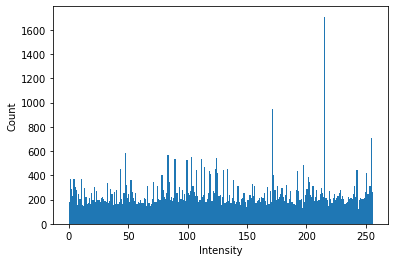

In [72]:
# Make histogram for the image
plt.hist(img_iarkt.ravel(),256,[0,256])
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Mix Columns Transformation**

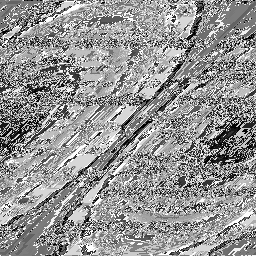

In [73]:
start_time = time.time()

def inv_mix_col_transform(img_iarkt):
  img_imct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img_iarkt[i][j]
      temp[1]=img_iarkt[i+1][j]
      temp[2]=img_iarkt[i+2][j]
      temp[3]=img_iarkt[i+3][j]
      
      img_imct[i][j] = galoisMult(temp[0],14) ^ galoisMult(temp[3],9) ^ galoisMult(temp[2],13) ^ galoisMult(temp[1],11)
      img_imct[i+1][j] = galoisMult(temp[1],14) ^ galoisMult(temp[0],9) ^ galoisMult(temp[3],13) ^ galoisMult(temp[2],11)
      img_imct[i+2][j] = galoisMult(temp[2],14) ^ galoisMult(temp[1],9) ^ galoisMult(temp[0],13) ^ galoisMult(temp[3],11)
      img_imct[i+3][j] = galoisMult(temp[3],14) ^ galoisMult(temp[2],9) ^ galoisMult(temp[1],13) ^ galoisMult(temp[0],11)

  return img_imct

img_imct=np.zeros((256,256),int)
img_imct=inv_mix_col_transform(img_iarkt)
# print(img_imct)
cv2_imshow(img_imct)

#print(time.time() - start_time)

time_taken_d.append(time.time() - start_time)
decryption.append("Inverse Mix Columns Transformation")

decryption_time_img1 += time.time() - start_time

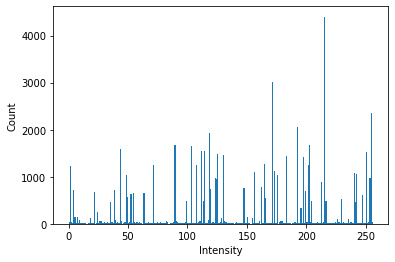

In [74]:
# Make histogram for the image 
plt.hist(img_imct.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Shift Rows Transformation**

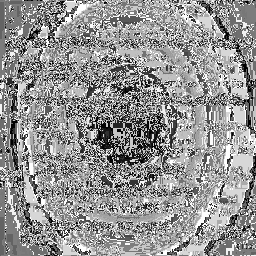

In [75]:
start_time = time.time()

def inv_shift_row_transform(img_imct):
  img_isrt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img_imct=img_imct.tolist()

  # Shift rows transformation
  for i in range(256):
    img_isrt[i]=img_imct[i][-i:]+img_imct[i][0:-i]
  
  return img_isrt

img_isrt=np.zeros((256,256),int)
img_isrt=inv_shift_row_transform(img_imct)
# print(img_isrt)
cv2_imshow(img_isrt)

#print(time.time() - start_time)

time_taken_d.append(time.time() - start_time)
decryption.append("Inverse Shift Rows Transformation")

decryption_time_img1 += time.time() - start_time

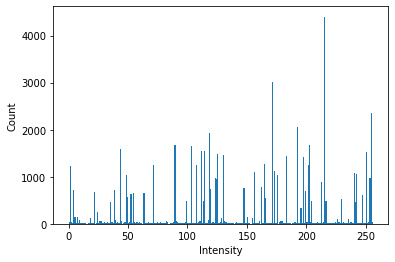

In [76]:
# Make histogram for the image 
plt.hist(img_isrt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Substitute Byte Transformation**

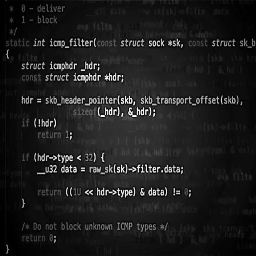

In [77]:
start_time = time.time()

def inv_sub_byte_transform(img_isrt):
  sboxInv = [
        0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
        0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
        0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
        0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
        0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
        0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
        0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
        0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
        0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
        0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
        0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
        0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
        0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
        0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
        0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img_isrt_hex = vhex(img_isrt)
  # print(img_isrt_hex)

  # Inverse substitute byte transformation
  img_isbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img_isrt_hex[i][j],0)
      img_isbt[i][j]=sboxInv[k]
  
  return img_isbt

img_isbt=np.zeros((256,256),int)
img_isbt=inv_sub_byte_transform(img_isrt)
# print(img_isbt)
cv2_imshow(img_isbt)

#print(time.time() - start_time)

time_taken_d.append(time.time() - start_time)
decryption.append("Inverse Substitute Byte Transformation")

decryption_time_img1 += time.time() - start_time

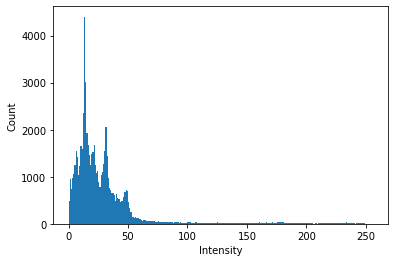

In [78]:
# Make histogram for the image 
plt.hist(img_isbt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time decryption

In [79]:
total_time_decryption= 0
for x in time_taken_d:
  total_time_decryption += x;
#print(total_time_decryption)

aes_img_1_ed.append(total_time_decryption)

In [80]:
decryption_image.append("Image 1")
decryption_type.append("Decryption")
decryption_time.append(decryption_time_img1)

###Storing data in Dataframe for analysis

In [81]:
encryption_time_ = pd.DataFrame(time_taken_e, index=encryption, columns=['Encryption Time'])
#print(encryption_time_)

In [82]:
decryption_time_ = pd.DataFrame(time_taken_d, index=decryption, columns=['Decryption Time'])
#print(decryption_time_)

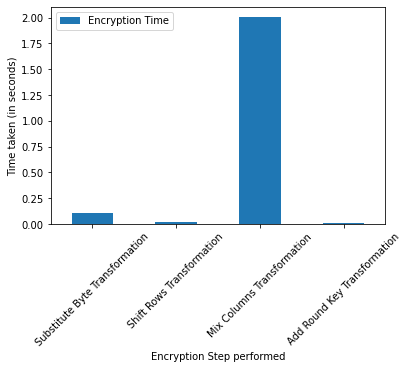

In [ ]:
encryption_time_.plot.bar(rot=45, xlabel='Encryption Step performed', ylabel='Time taken (in seconds)')

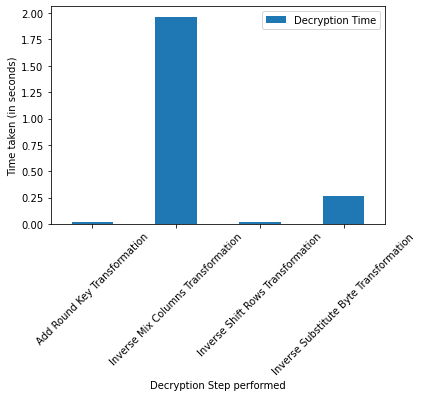

In [ ]:
decryption_time_.plot.bar(rot=45, xlabel='Decryption Step performed', ylabel='Time taken (in seconds)')

## **AES Algorithm On Image 2**

In [83]:
#Creating variables to store time data
time_taken_e_2 = []
encryption_2 = []
time_taken_d_2 = []
decryption_2 = []

### **Image Preprocessing**

(533, 800, 3)


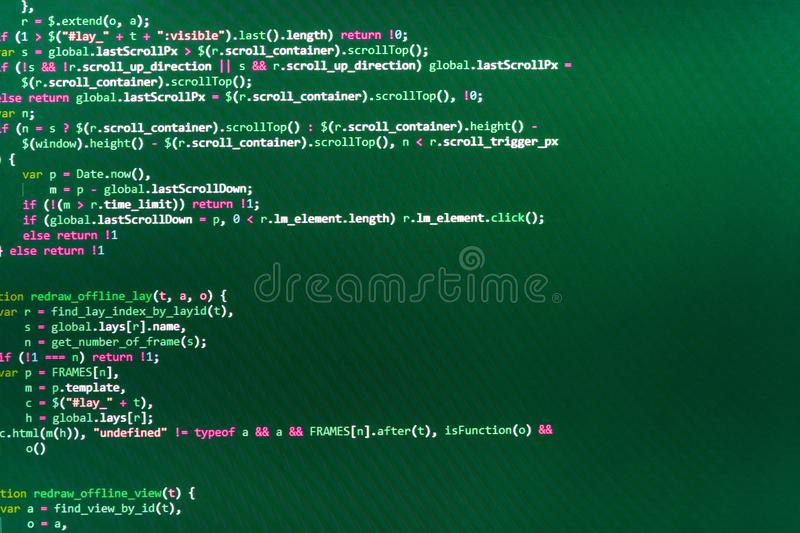


 (533, 800)


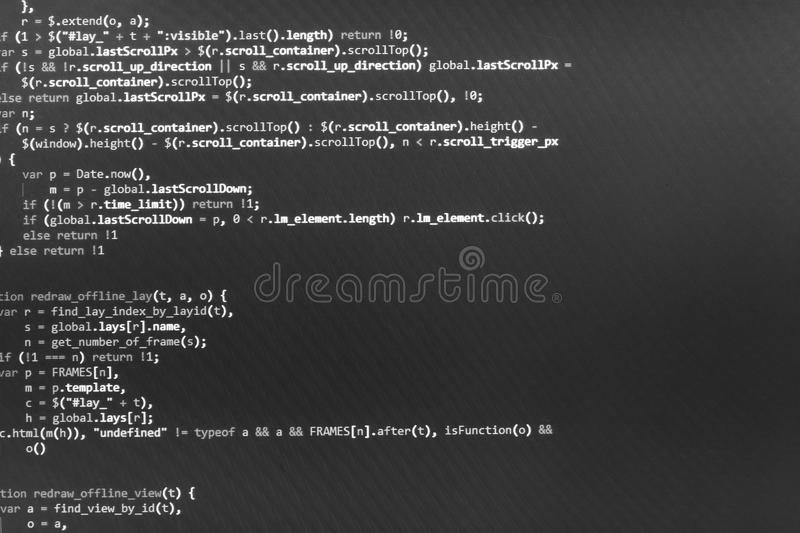


 (256, 256)


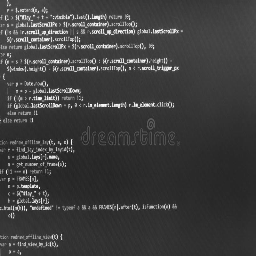

In [84]:
# Loading the image
img2 = cv2.imread('drive/My Drive/CN_Project/2.jpg')
#plt.imshow(img)
print(img2.shape)
cv2_imshow(img2)

# RGB to grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print('\n',img2.shape)
cv2_imshow(img2)

# Resizing
img2=cv2.resize(img2,(256,256))
print('\n',img2.shape)
cv2_imshow(img2)

# print(img)

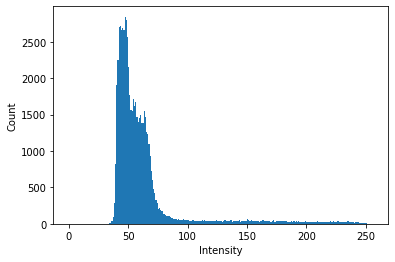

In [85]:
# Make histogram for the image 
plt.hist(img2.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

### **Image Encryption**

In [86]:
# Round Key generation
roundKey=np.random.randint(256,size=(256,256))

**Substitute Byte Transformation**

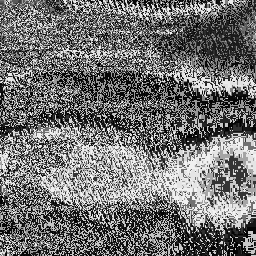

In [87]:
start_time = time.time()

def sub_byte_transform(img2):
  sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img2_hex = vhex(img2)
  # print(img_hex)

  # Substitute byte transformation
  img2_sbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img2_hex[i][j],0)
      img2_sbt[i][j]=sbox[k]
  return img2_sbt

img2_sbt=np.zeros((256,256),int)
img2_sbt=sub_byte_transform(img2)
# print(img_sbt)
cv2_imshow(img2_sbt)

#print(time.time() - start_time)
time_taken_e_2.append(time.time() - start_time)
encryption_2.append("Substitute Byte Transformation")

encryption_time_img2 += time.time() - start_time

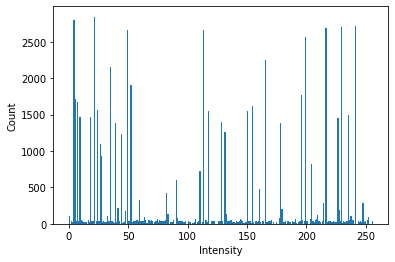

In [88]:
# Make histogram for the image 
plt.hist(img2_sbt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Shift Rows Transformation**

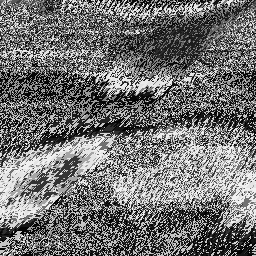

In [89]:
start_time = time.time()

def shift_row_transform(img2_sbt):
  img2_srt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img2_sbt=img2_sbt.tolist()

  #  Shift rows transformation
  for i in range(256):
    img2_srt[i]=img2_sbt[i][i:]+img2_sbt[i][0:i]
  
  return img2_srt

img2_srt=np.zeros((256,256),int)
img2_srt=shift_row_transform(img2_sbt)
# print(img_srt)
cv2_imshow(img2_srt)

#print(time.time() - start_time)
time_taken_e_2.append(time.time() - start_time)
encryption_2.append("Shift Rows Transformation")

encryption_time_img2 += time.time() - start_time

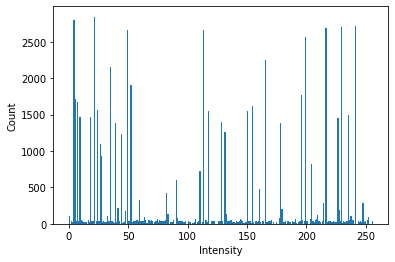

In [90]:
# Make histogram for the image 
plt.hist(img2_srt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Mix Columns Transformation**

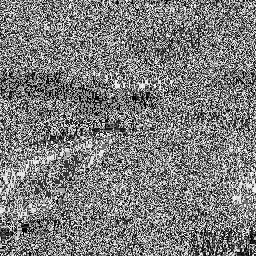

In [91]:
start_time = time.time()

def mix_col_transform(img2_srt):
  img2_mct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img2_srt[i][j]
      temp[1]=img2_srt[i+1][j]
      temp[2]=img2_srt[i+2][j]
      temp[3]=img2_srt[i+3][j]
      
      img2_mct[i][j] = galoisMult(temp[0],2) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],3)
      img2_mct[i+1][j] = galoisMult(temp[1],2) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],3)
      img2_mct[i+2][j] = galoisMult(temp[2],2) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],3)
      img2_mct[i+3][j] = galoisMult(temp[3],2) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],3)

  return img2_mct

img2_mct=np.zeros((256,256),int)
img2_mct=mix_col_transform(img2_srt)
# print(img_mct)
cv2_imshow(img2_mct)

#print(time.time() - start_time)

time_taken_e_2.append(time.time() - start_time)
encryption_2.append("Mix Columns Transformation")

encryption_time_img2 += time.time() - start_time

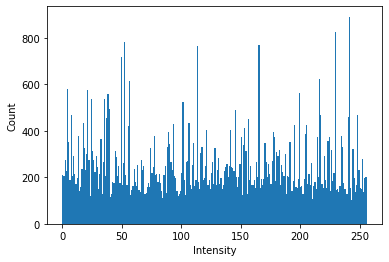

In [92]:
# Make histogram for the image 
plt.hist(img2_mct.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Add Round Key Transformation**

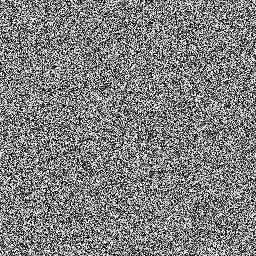

In [93]:
start_time = time.time()

def add_round_key_transform(img2_mct,roundKey):
  img2_arkt=np.zeros((256,256),int)
  img2_arkt=img2_mct^roundKey

  return img2_arkt

img2_arkt=np.zeros((256,256),int)
img2_arkt=add_round_key_transform(img2_mct,roundKey)
# print(img_arkt)
cv2_imshow(img2_arkt)

#print(time.time() - start_time)

time_taken_e_2.append(time.time() - start_time)
encryption_2.append("Add Round Key Transformation")

encryption_time_img2 += time.time() - start_time

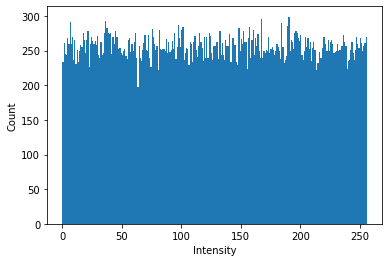

In [94]:
# Make histogram for the image 
plt.hist(img2_arkt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time taken to do the Encryption

In [95]:
total_time_encryption_2= 0
for x in time_taken_e_2:
  total_time_encryption_2 += x;
# print(total_time_encryption_2)

aes_img_2_ed.append(total_time_encryption_2)

In [96]:
encryption_image.append("Image 2")
encryption_type.append("Encryption")
encryption_time.append(encryption_time_img2)

### **Image Decryption**

**Add Round Key Transformation**

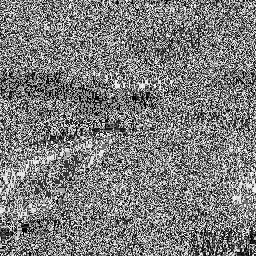

In [97]:
start_time = time.time()

def inverse_add_round_key_transform(img2_arkt,roundKey):
  img2_iarkt=np.zeros((256,256),int)
  img2_iarkt=img2_arkt^roundKey

  return img2_iarkt

img2_iarkt=np.zeros((256,256),int)
img2_iarkt=inverse_add_round_key_transform(img2_arkt,roundKey)
# print(img_iarkt)
cv2_imshow(img2_iarkt)

#print(time.time() - start_time)

time_taken_d_2.append(time.time() - start_time)
decryption_2.append("Add Round Key Transformation")

decryption_time_img2 += time.time() - start_time

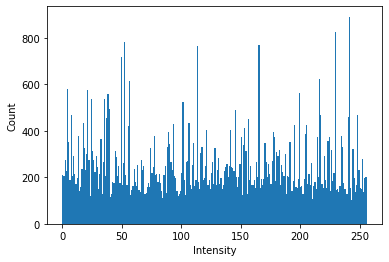

In [98]:
# Make histogram for the image 
plt.hist(img2_iarkt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Mix Columns Transformation**

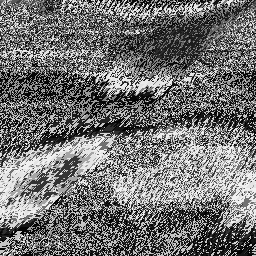

In [99]:
start_time = time.time()

def inv_mix_col_transform(img2_iarkt):
  img2_imct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img2_iarkt[i][j]
      temp[1]=img2_iarkt[i+1][j]
      temp[2]=img2_iarkt[i+2][j]
      temp[3]=img2_iarkt[i+3][j]
      
      img2_imct[i][j] = galoisMult(temp[0],14) ^ galoisMult(temp[3],9) ^ galoisMult(temp[2],13) ^ galoisMult(temp[1],11)
      img2_imct[i+1][j] = galoisMult(temp[1],14) ^ galoisMult(temp[0],9) ^ galoisMult(temp[3],13) ^ galoisMult(temp[2],11)
      img2_imct[i+2][j] = galoisMult(temp[2],14) ^ galoisMult(temp[1],9) ^ galoisMult(temp[0],13) ^ galoisMult(temp[3],11)
      img2_imct[i+3][j] = galoisMult(temp[3],14) ^ galoisMult(temp[2],9) ^ galoisMult(temp[1],13) ^ galoisMult(temp[0],11)

  return img2_imct

img2_imct=np.zeros((256,256),int)
img2_imct=inv_mix_col_transform(img2_iarkt)
# print(img_imct)
cv2_imshow(img2_imct)

#print(time.time() - start_time)

time_taken_d_2.append(time.time() - start_time)
decryption_2.append("Inverse Mix Columns Transformation")

decryption_time_img2 += time.time() - start_time

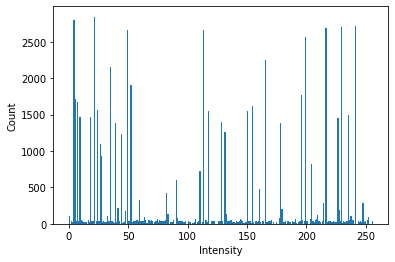

In [100]:
# Make histogram for the image 
plt.hist(img2_imct.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Shift Rows Transformation**

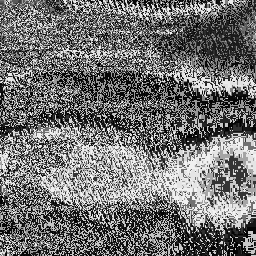

In [101]:
start_time = time.time()

def inv_shift_row_transform(img2_imct):
  img2_isrt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img2_imct=img2_imct.tolist()

  # Shift rows transformation
  for i in range(256):
    img2_isrt[i]=img2_imct[i][-i:]+img2_imct[i][0:-i]
  
  return img2_isrt

img2_isrt=np.zeros((256,256),int)
img2_isrt=inv_shift_row_transform(img2_imct)
# print(img_isrt)
cv2_imshow(img2_isrt)

#print(time.time() - start_time)

time_taken_d_2.append(time.time() - start_time)
decryption_2.append("Inverse Shift Rows Transformation")

decryption_time_img2 += time.time() - start_time

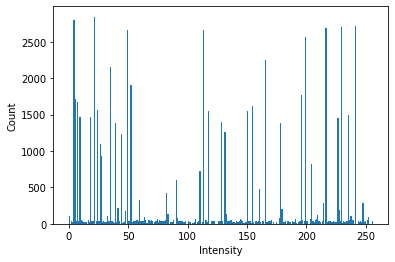

In [102]:
# Make histogram for the image 
plt.hist(img2_isrt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Substitute Byte Transformation**

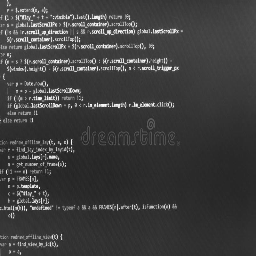

In [103]:
start_time = time.time()

def inv_sub_byte_transform(img2_isrt):
  sboxInv = [
        0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
        0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
        0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
        0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
        0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
        0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
        0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
        0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
        0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
        0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
        0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
        0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
        0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
        0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
        0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img2_isrt_hex = vhex(img2_isrt)
  # print(img_isrt_hex)

  # Inverse substitute byte transformation
  img2_isbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img2_isrt_hex[i][j],0)
      img2_isbt[i][j]=sboxInv[k]
  
  return img2_isbt

img2_isbt=np.zeros((256,256),int)
img2_isbt=inv_sub_byte_transform(img2_isrt)
# print(img_isbt)
cv2_imshow(img2_isbt)

#print(time.time() - start_time)

time_taken_d_2.append(time.time() - start_time)
decryption_2.append("Inverse Substitute Byte Transformation")

decryption_time_img2 += time.time() - start_time

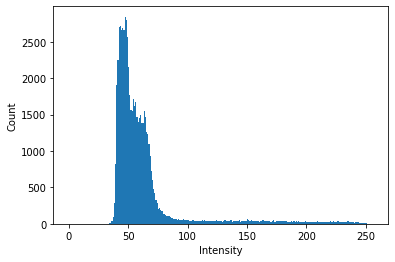

In [104]:
# Make histogram for the image 
plt.hist(img2_isbt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time decryption

In [105]:
total_time_decryption_2= 0
for x in time_taken_d_2:
  total_time_decryption_2 += x;
#print(total_time_decryption_2)

aes_img_2_ed.append(total_time_decryption_2)

In [106]:
decryption_image.append("Image 2")
decryption_type.append("Decryption")
decryption_time.append(decryption_time_img2)

###Storing data in Excel for analysis

In [107]:
encryption_time_2 = pd.DataFrame(time_taken_e_2, index=encryption_2, columns=['Encryption Time'])
#print(encryption_time_2)

In [108]:
decryption_time_2 = pd.DataFrame(time_taken_d_2, index=decryption_2, columns=['Decryption Time'])
#print(decryption_time_2)

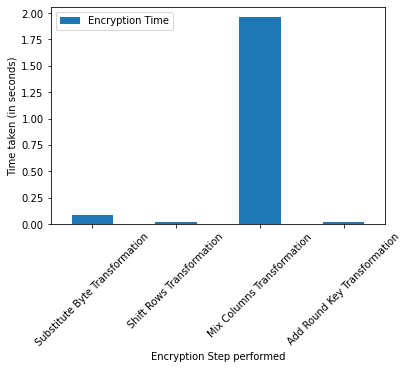

In [ ]:
encryption_time_2.plot.bar(rot=45, xlabel='Encryption Step performed', ylabel='Time taken (in seconds)')

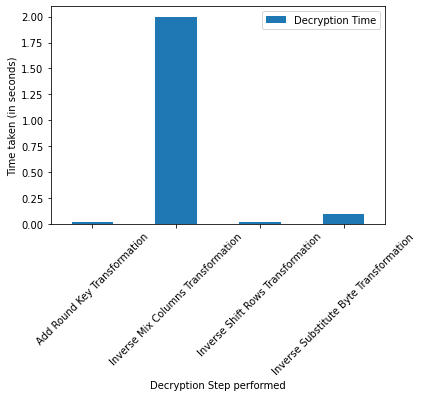

In [ ]:
decryption_time_2.plot.bar(rot=45, xlabel='Decryption Step performed', ylabel='Time taken (in seconds)')

## **AES Algorithm On Image 3**

In [109]:
#Creating variables to store time data
time_taken_e_3 = []
encryption_3 = []
time_taken_d_3 = []
decryption_3 = []

### **Image Preprocessing**

(340, 546, 3)


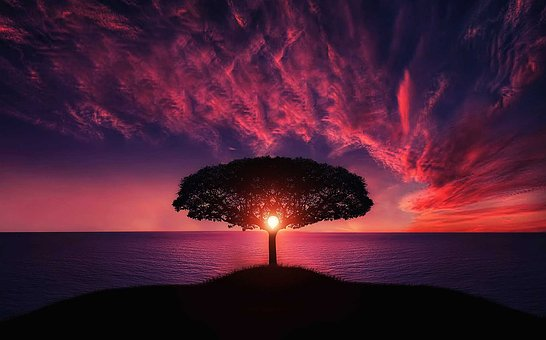


 (340, 546)


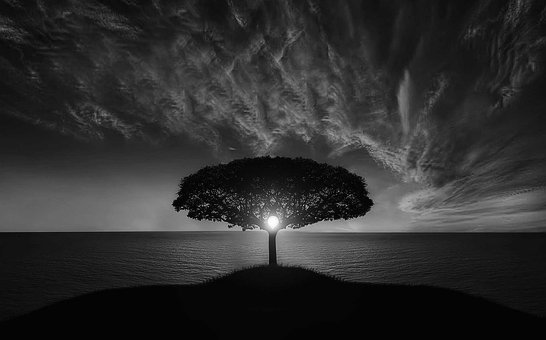


 (256, 256)


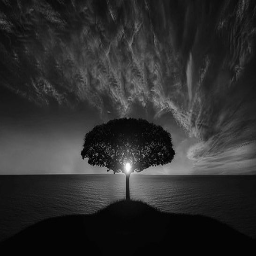

In [110]:
# Loading the image
img3 = cv2.imread('drive/My Drive/CN_Project/3.jpg')
#plt.imshow(img)
print(img3.shape)
cv2_imshow(img3)

# RGB to grayscale
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
print('\n',img3.shape)
cv2_imshow(img3)

# Resizing
img3=cv2.resize(img3,(256,256))
print('\n',img3.shape)
cv2_imshow(img3)

# print(img)

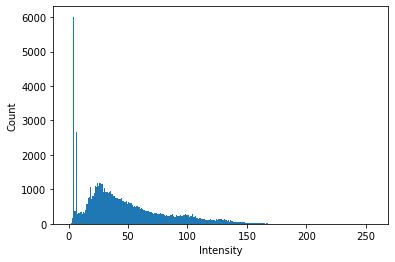

In [111]:
# Make histogram for the image 
plt.hist(img3.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

### **Image Encryption**

In [112]:
# Round Key generation
roundKey=np.random.randint(256,size=(256,256))

**Substitute Byte Transformation**

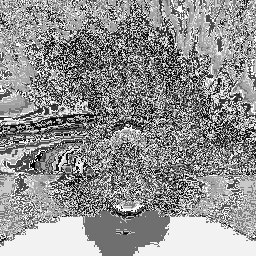

In [113]:
start_time = time.time()

def sub_byte_transform(img3):
  sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img3_hex = vhex(img3)
  # print(img_hex)

  # Substitute byte transformation
  img3_sbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img3_hex[i][j],0)
      img3_sbt[i][j]=sbox[k]
  return img3_sbt

img3_sbt=np.zeros((256,256),int)
img3_sbt=sub_byte_transform(img3)
# print(img_sbt)
cv2_imshow(img3_sbt)

#print(time.time() - start_time)
time_taken_e_3.append(time.time() - start_time)
encryption_3.append("Substitute Byte Transformation")

encryption_time_img3 += time.time() - start_time

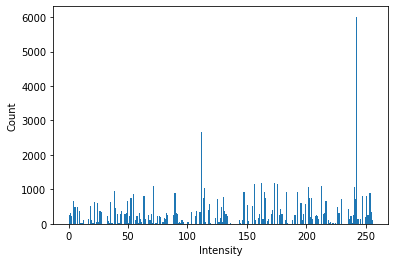

In [114]:
# Make histogram for the image 
plt.hist(img3_sbt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Shift Rows Transformation**

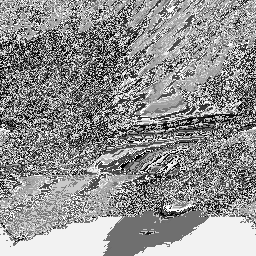

In [115]:
start_time = time.time()

def shift_row_transform(img3_sbt):
  img3_srt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img3_sbt=img3_sbt.tolist()

  #  Shift rows transformation
  for i in range(256):
    img3_srt[i]=img3_sbt[i][i:]+img3_sbt[i][0:i]
  
  return img3_srt

img3_srt=np.zeros((256,256),int)
img3_srt=shift_row_transform(img3_sbt)
# print(img_srt)
cv2_imshow(img3_srt)

#print(time.time() - start_time)
time_taken_e_3.append(time.time() - start_time)
encryption_3.append("Shift Rows Transformation")

encryption_time_img3 += time.time() - start_time

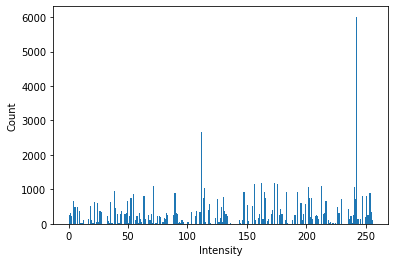

In [116]:
# Make histogram for the image 
plt.hist(img3_srt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Mix Columns Transformation**

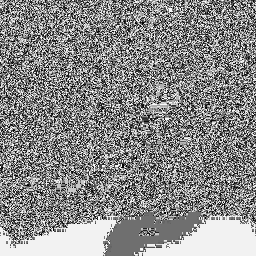

In [117]:
start_time = time.time()

def mix_col_transform(img3_srt):
  img3_mct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img3_srt[i][j]
      temp[1]=img3_srt[i+1][j]
      temp[2]=img3_srt[i+2][j]
      temp[3]=img3_srt[i+3][j]
      
      img3_mct[i][j] = galoisMult(temp[0],2) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],3)
      img3_mct[i+1][j] = galoisMult(temp[1],2) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],3)
      img3_mct[i+2][j] = galoisMult(temp[2],2) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],3)
      img3_mct[i+3][j] = galoisMult(temp[3],2) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],3)

  return img3_mct

img3_mct=np.zeros((256,256),int)
img3_mct=mix_col_transform(img3_srt)
# print(img_mct)
cv2_imshow(img3_mct)

#print(time.time() - start_time)

time_taken_e_3.append(time.time() - start_time)
encryption_3.append("Mix Columns Transformation")

encryption_time_img3 += time.time() - start_time

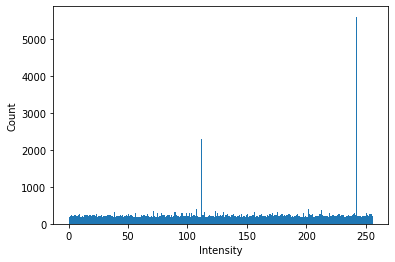

In [118]:
# Make histogram for the image 
plt.hist(img3_mct.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Add Round Key Transformation**

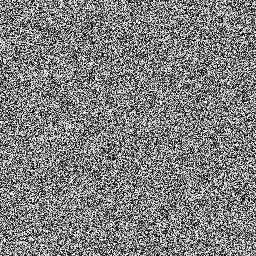

In [119]:
start_time = time.time()

def add_round_key_transform(img3_mct,roundKey):
  img3_arkt=np.zeros((256,256),int)
  img3_arkt=img3_mct^roundKey

  return img3_arkt

img3_arkt=np.zeros((256,256),int)
img3_arkt=add_round_key_transform(img3_mct,roundKey)
# print(img_arkt)
cv2_imshow(img3_arkt)

#print(time.time() - start_time)

time_taken_e_3.append(time.time() - start_time)
encryption_3.append("Add Round Key Transformation")

encryption_time_img3 += time.time() - start_time

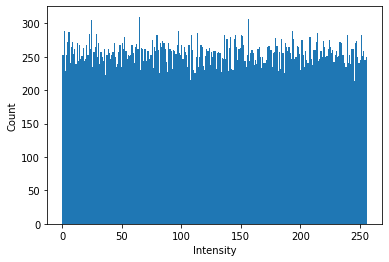

In [120]:
# Make histogram for the image 
plt.hist(img3_arkt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time taken to do the Encryption

In [121]:
total_time_encryption_3= 0
for x in time_taken_e_3:
  total_time_encryption_3 += x;
#print(total_time_encryption_3)

aes_img_3_ed.append(total_time_encryption_3)

In [122]:
encryption_image.append("Image 3")
encryption_type.append("Encryption")
encryption_time.append(encryption_time_img3)

### **Image Decryption**

**Add Round Key Transformation**

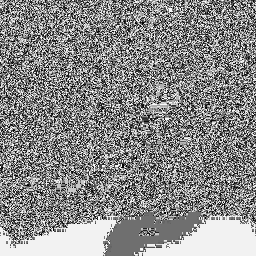

In [123]:
start_time = time.time()

def inverse_add_round_key_transform(img3_arkt,roundKey):
  img3_iarkt=np.zeros((256,256),int)
  img3_iarkt=img3_arkt^roundKey

  return img3_iarkt

img3_iarkt=np.zeros((256,256),int)
img3_iarkt=inverse_add_round_key_transform(img3_arkt,roundKey)
# print(img_iarkt)
cv2_imshow(img3_iarkt)

#print(time.time() - start_time)

time_taken_d_3.append(time.time() - start_time)
decryption_3.append("Add Round Key Transformation")

decryption_time_img3 += time.time() - start_time
#print(decryption_time_img3)

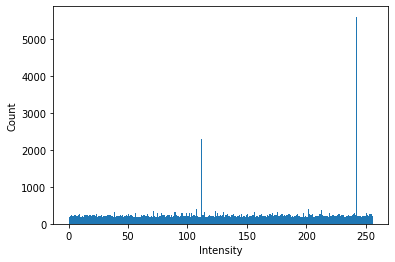

In [124]:
# Make histogram for the image 
plt.hist(img3_iarkt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Mix Columns Transformation**

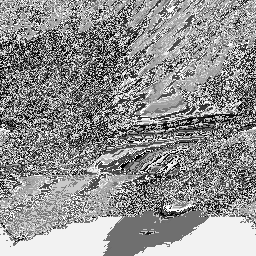

In [125]:
start_time = time.time()

def inv_mix_col_transform(img3_iarkt):
  img3_imct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img3_iarkt[i][j]
      temp[1]=img3_iarkt[i+1][j]
      temp[2]=img3_iarkt[i+2][j]
      temp[3]=img3_iarkt[i+3][j]
      
      img3_imct[i][j] = galoisMult(temp[0],14) ^ galoisMult(temp[3],9) ^ galoisMult(temp[2],13) ^ galoisMult(temp[1],11)
      img3_imct[i+1][j] = galoisMult(temp[1],14) ^ galoisMult(temp[0],9) ^ galoisMult(temp[3],13) ^ galoisMult(temp[2],11)
      img3_imct[i+2][j] = galoisMult(temp[2],14) ^ galoisMult(temp[1],9) ^ galoisMult(temp[0],13) ^ galoisMult(temp[3],11)
      img3_imct[i+3][j] = galoisMult(temp[3],14) ^ galoisMult(temp[2],9) ^ galoisMult(temp[1],13) ^ galoisMult(temp[0],11)

  return img3_imct

img3_imct=np.zeros((256,256),int)
img3_imct=inv_mix_col_transform(img3_iarkt)
# print(img_imct)
cv2_imshow(img3_imct)

#print(time.time() - start_time)

time_taken_d_3.append(time.time() - start_time)
decryption_3.append("Inverse Mix Columns Transformation")

decryption_time_img3 += time.time() - start_time

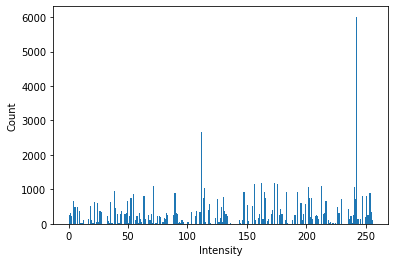

In [126]:
# Make histogram for the image 
plt.hist(img3_imct.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Shift Rows Transformation**

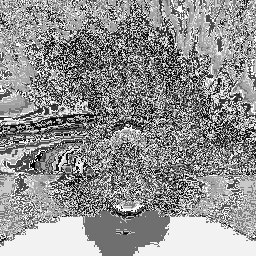

In [127]:
start_time = time.time()

def inv_shift_row_transform(img3_imct):
  img3_isrt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img3_imct=img3_imct.tolist()

  # Shift rows transformation
  for i in range(256):
    img3_isrt[i]=img3_imct[i][-i:]+img3_imct[i][0:-i]
  
  return img3_isrt

img3_isrt=np.zeros((256,256),int)
img3_isrt=inv_shift_row_transform(img3_imct)
# print(img_isrt)
cv2_imshow(img3_isrt)

#print(time.time() - start_time)

time_taken_d_3.append(time.time() - start_time)
decryption_3.append("Inverse Shift Rows Transformation")

decryption_time_img3 += time.time() - start_time

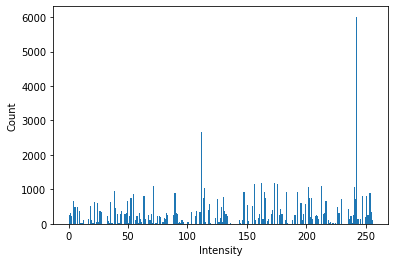

In [128]:
# Make histogram for the image 
plt.hist(img3_isrt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

**Inverse Substitute Byte Transformation**

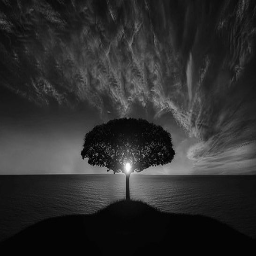

In [129]:
start_time = time.time()

def inv_sub_byte_transform(img3_isrt):
  sboxInv = [
        0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
        0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
        0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
        0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
        0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
        0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
        0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
        0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
        0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
        0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
        0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
        0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
        0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
        0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
        0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img3_isrt_hex = vhex(img3_isrt)
  # print(img_isrt_hex)

  # Inverse substitute byte transformation
  img3_isbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img3_isrt_hex[i][j],0)
      img3_isbt[i][j]=sboxInv[k]
  
  return img3_isbt

img3_isbt=np.zeros((256,256),int)
img3_isbt=inv_sub_byte_transform(img3_isrt)
# print(img_isbt)
cv2_imshow(img3_isbt)

#print(time.time() - start_time)

time_taken_d_3.append(time.time() - start_time)
decryption_3.append("Inverse Substitute Byte Transformation")

decryption_time_img3 += time.time() - start_time

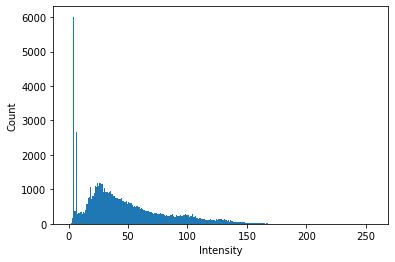

In [130]:
# Make histogram for the image 
plt.hist(img3_isbt.ravel(),256,[0,256]) 
plt.xlabel("Intensity") 
plt.ylabel("Count")
plt.show()

###Total time decryption

In [ ]:
total_time_decryption_3= 0
for x in time_taken_d_3:
  total_time_decryption_3 += x;
print(total_time_decryption_3)

aes_img_3_ed.append(total_time_decryption_3)

2.1038758754730225


In [ ]:
decryption_image.append("Image 3")
decryption_type.append("Decryption")
decryption_time.append(decryption_time_img3)

###Storing data in Excel for analysis

In [ ]:
encryption_time_3 = pd.DataFrame(time_taken_e_3, index=encryption_3, columns=['Encryption Time'])
print(encryption_time_3)

                                Encryption Time
Substitute Byte Transformation         0.089859
Shift Rows Transformation              0.022769
Mix Columns Transformation             2.012615
Add Round Key Transformation           0.014955


In [ ]:
decryption_time_3 = pd.DataFrame(time_taken_d_3, index=decryption_3, columns=['Decryption Time'])
print(decryption_time_3)

                                        Decryption Time
Add Round Key Transformation                   0.014201
Inverse Mix Columns Transformation             1.976214
Inverse Shift Rows Transformation              0.023721
Inverse Substitute Byte Transformation         0.089740


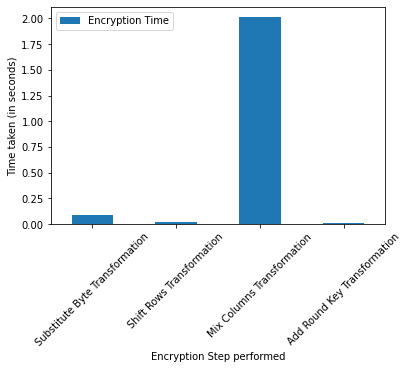

In [ ]:
encryption_time_3.plot.bar(rot=45, xlabel='Encryption Step performed', ylabel='Time taken (in seconds)')

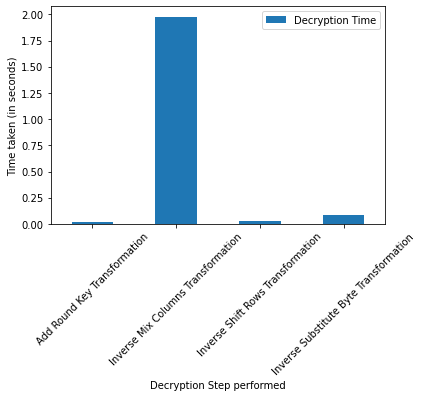

In [ ]:
decryption_time_3.plot.bar(rot=45, xlabel='Decryption Step performed', ylabel='Time taken (in seconds)')

#Comparision between two images processed

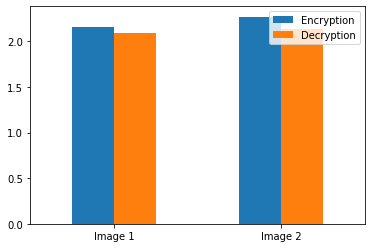

In [ ]:
index = ['Image 1', 'Image 2']
aes_img_analysis = pd.DataFrame({'Encryption': aes_img_1_ed, 'Decryption': aes_img_2_ed}, index=index)
aes_img_analysis.plot.bar(rot=0)

# **Encryption/ Decryption Analysis**

In [ ]:
import pandas as pd

In [ ]:
import xlwt
import xlsxwriter
from xlwt import Workbook

In [ ]:
from google.colab import files

In [ ]:
#creating worksheets

workbook = xlsxwriter.Workbook('AES_Encryption_time.xlsx')
worksheet = workbook.add_worksheet()

workbook2 = xlsxwriter.Workbook('AES_Decryption_time.xlsx')
worksheet2 = workbook2.add_worksheet()

In [ ]:
#Storing data in excel

row_num =0

worksheet.write('A1', 'Image')
worksheet.write('B1', 'Type')
worksheet.write('C1', 'Time')

row_num +=1

for row_num, data in enumerate(encryption_image):
    worksheet.write(row_num, 0, encryption_image[row_num])

for row_num, data in enumerate(encryption_type):
    worksheet.write(row_num, 1, encryption_type[row_num])

for row_num, data in enumerate(encryption_time):
    worksheet.write(row_num, 2, encryption_time[row_num])
workbook.close()

In [ ]:
#Storing data in excel

row_num =0

worksheet2.write('A1', 'Image')
worksheet2.write('B1', 'Type')
worksheet2.write('C1', 'Time')

row_num +=1

for row_num, data in enumerate(decryption_image):
    worksheet2.write(row_num, 0, decryption_image[row_num])

for row_num, data in enumerate(decryption_type):
    worksheet2.write(row_num, 1, decryption_type[row_num])

for row_num, data in enumerate(decryption_time):
    worksheet2.write(row_num, 2, decryption_time[row_num])
workbook2.close()

In [ ]:
files.download("AES_Encryption_time.xlsx")
files.download("AES_Decryption_time.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_excel("AES_Encryption_time.xlsx")
df

Image        Type      Time
0  Image 1  Encryption  2.154668
1  Image 2  Encryption  2.088512
2  Image 3  Encryption  2.140566

In [ ]:
df2 = pd.read_excel("AES_Decryption_time.xlsx")
df2

Image        Type      Time
0  Image 1  Decryption  2.269047
1  Image 2  Decryption  2.130395
2  Image 3  Decryption  2.104200

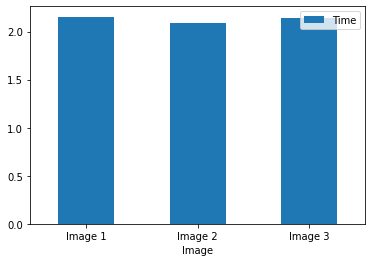

In [ ]:
df.plot.bar(x='Image', y='Time', rot=0)

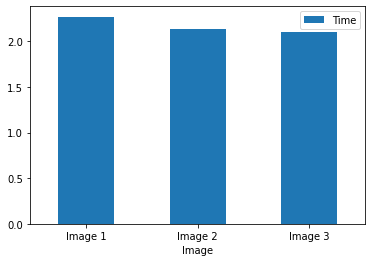

In [ ]:
df2.plot.bar(x='Image', y='Time', rot=0)

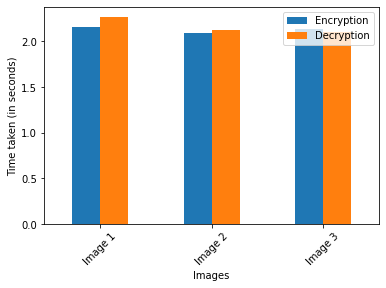

In [ ]:
df_c = pd.merge(df, df2, on='Image')
ax = df_c.plot.bar(x='Image', xlabel='Images', ylabel='Time taken (in seconds)', rot=45)
ax.legend(["Encryption", "Decryption"]);